In [25]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
from langdetect import detect_langs #detect lang
from langdetect import detect #detect lang

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Pandas version 1.1.5
Matplotlib version 3.3.2


In [26]:
import glob

path = 'shake'
all_files = glob.glob(path + "/*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, engine = 'python', index_col=None, header=0)
    li.append(df)
# print(li)
    
raw_data = pd.concat(li, axis=0, ignore_index=True)
raw_data.info()

['shake/Shakebugs Export - Sep 2.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Reporter     513 non-null    object 
 1   Description  513 non-null    object 
 2   Shake Url    513 non-null    object 
 3   Device       513 non-null    object 
 4   App Version  513 non-null    object 
 5   Username     491 non-null    object 
 6   Country      449 non-null    object 
 7   Date         453 non-null    object 
 8   User Type    0 non-null      float64
dtypes: float64(1), object(8)
memory usage: 36.2+ KB


<AxesSubplot:ylabel='App Version'>

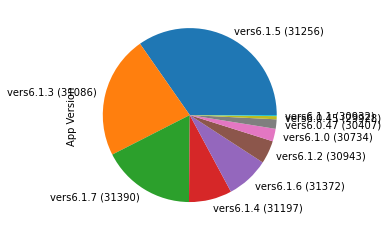

In [27]:
raw_data['App Version'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Country'>

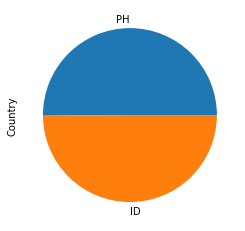

In [28]:
raw_data['Country'].value_counts().plot(kind='pie')

In [29]:

has_review = pd.notnull(raw_data['Description'])
is_id = raw_data['Country'] == "ID"
is_ph = raw_data['Country'] == "PH"

id_with_review = raw_data[has_review & is_id]
ph_with_review = raw_data[has_review & is_ph]

print("id review: ", len(id_with_review), " vs ph review: ", len(ph_with_review))

id review:  224  vs ph review:  225


In [30]:
print("ID:")
id_with_review[['Description', 'App Version']].tail(30)

ID:


,Description,App Version
431,Gs,vers6.1.2 (30943)
432,Tugasnya tidak muncul,vers6.1.7 (31390)
433,Gak bisa lihat tugas,vers6.1.7 (31390)
434,Tugas tidak keluar,vers6.1.7 (31390)
436,"hai, saya seorang siswi, saya mau melaporkan b...",vers6.1.7 (31390)
438,taak ada tugas pdhl dah kasih tugasnya,vers6.1.7 (31390)
442,Nomer anggota sekolah saya tidak bisa dihapus,vers6.1.7 (31390)
453,"Force close happens many times, first, i thoug...",vers6.1.7 (31390)
454,I can't login from browser,vers6.1.2 (30943)
458,video tidak bisa diputar,vers6.1.7 (31390)


In [31]:
print ("PH:")
ph_with_review[['Description', 'App Version']].tail(30)

PH:


,Description,App Version
447,image is not loading,vers6.1.7 (31390)
448,Can not click the choose image,vers6.1.7 (31390)
449,I can't clicked my class,vers6.1.5 (31256)
450,Ma'am /sir. Dili po ako maka dawat sa hi send ...,vers6.1.7 (31390)
451,Cannot see pictures,vers6.1.5 (31256)
455,why so cool,vers6.1.6 (31372)
456,I finished this before the due date. And now I...,vers6.1.6 (31372)
463,delete,vers6.1.3 (31086)
464,Why can't I get into a class even I wrote down...,vers6.1.7 (31390)
465,There is something missing in my to- dos list,vers6.1.6 (31372)
